<a href="https://colab.research.google.com/github/VarunP2304/FishML/blob/main/FishML_reimagined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **FishML**

In [5]:
!git clone https://github.com/kidscoots101/FishML.git
%cd FishML
!pip install -r requirements.txt


Cloning into 'FishML'...
remote: Enumerating objects: 499, done.
remote: Counting objects: 100% (496/496), done.
remote: Compressing objects: 100% (407/407), done.
remote: Total 499 (delta 85), reused 486 (delta 79), pack-reused 3 (from 1)
Receiving objects: 100% (499/499), 1.18 GiB | 33.26 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Updating files: 100% (536/536), done.
/content/FishML
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [6]:
import os

def setup_dataset(repo_url='https://github.com/kidscoots101/FishML.git',
                  branch='62ccd912a055fca0aecd2531d7b03ca2df2a4b3c'):
    if not os.path.exists('FishML'):
        os.system(f'git clone --branch {branch} {repo_url}')
    return os.path.join('FishML', 'Dataset.csv')


Found 259 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.4866 - loss: 4.7262 - val_accuracy: 0.6562 - val_loss: 0.6859
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.6937 - loss: 0.6513 - val_accuracy: 0.6562 - val_loss: 0.5214
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.7238 - loss: 0.5158 - val_accuracy: 0.7500 - val_loss: 0.4369
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step - accuracy: 0.7817 - loss: 0.4976 - val_accuracy: 0.9062 - val_loss: 0.2474
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.8617 - loss: 0.3445 - val_accuracy: 0.9062 - val_loss: 0.2299
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.9067 - loss: 0.2326 - val_accuracy: 0.9375 - val_loss: 0.2572
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.9047 - loss: 0.2077 - val_accuracy: 0.9375 - val_loss: 0.1395
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.9579 - loss: 0.1054 - val_accuracy: 0.9688 - val_loss: 0.1538
Epoch 9/

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
📋 Classification Report:

              precision    recall  f1-score   support

     healthy       0.31      0.36      0.33        11
    infected       0.63      0.57      0.60        21

    accuracy                           0.50        32
   macro avg       0.47      0.47      0.47        32
weighted avg       0.52      0.50      0.51        32


📊 Confusion Matrix:


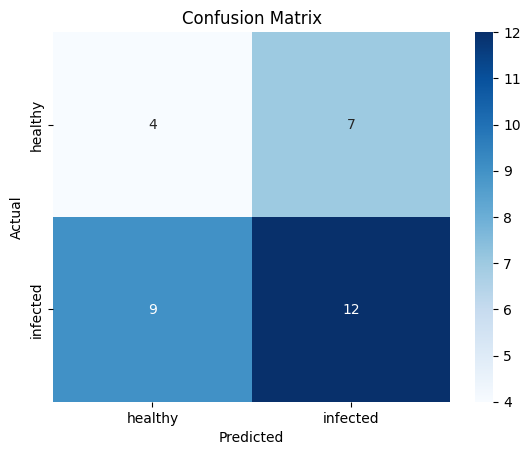


⭐ F1 Score (weighted): 0.5083


In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# -----------------------------
# 1. Load and Preprocess Data
# -----------------------------
def load_data(data_dir):
    train_dir = os.path.join(data_dir, "training_set")
    val_dir = os.path.join(data_dir, "validation_set")
    test_dir = os.path.join(data_dir, "testing_set")

    datagen = ImageDataGenerator(rescale=1./255)

    train = datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
    val = datagen.flow_from_directory(val_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')
    test = datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical')

    return train, val, test

# -----------------------------
# 2. Build CNN Model
# -----------------------------
def build_model(input_shape=(150, 150, 3), num_classes=2):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# -----------------------------
# 3. Train the Model
# -----------------------------
def train_model(data_dir):
    train, val, _ = load_data(data_dir)
    model = build_model(input_shape=(150, 150, 3), num_classes=train.num_classes)
    history = model.fit(train, epochs=10, validation_data=val)
    os.makedirs("trained_model", exist_ok=True)
    model.save("trained_model/fish_cnn.h5")
    return model, history, val

# -----------------------------
# 4. Evaluate the Model
# -----------------------------
def evaluate_model(model, val):
    y_true = val.classes
    y_pred_probs = model.predict(val)
    y_pred = np.argmax(y_pred_probs, axis=1)
    labels = list(val.class_indices.keys())

    print("📋 Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=labels))

    print("\n📊 Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"\n⭐ F1 Score (weighted): {f1:.4f}")

# -----------------------------
# 5. Run Everything
# -----------------------------
if __name__ == "__main__":
    DATA_PATH = "Dataset.csv"
    model, history, val = train_model(DATA_PATH)
    evaluate_model(model, val)
